In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/Preprocessed_Bank_Customer_Churn_Prediction.csv')

# 사용할 피처 선택 (customer_id 제거)
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

X = df[features]
y = df['churn']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

리포트 :
               precision    recall  f1-score   support

           0     0.8648    0.8349    0.8496      1593
           1     0.4307    0.4889    0.4580       407

    accuracy                         0.7645      2000
   macro avg     0.6477    0.6619    0.6538      2000
weighted avg     0.7764    0.7645    0.7699      2000



In [51]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': range(1, 11),
#     # 'criterion': ['gini', 'entropy'],
#     # 'splitter': ['best', 'random'],
#     'min_samples_split': range(2, 11),
#     'min_samples_leaf': range(1, 11),
# }

# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# print('최적의 하이퍼파라미터 :', grid_search.best_params_)

# 최적의 하이퍼파라미터 : {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}

from sklearn.metrics import classification_report
# 최적의 하이퍼파라미터로 학습
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

clf.fit(X_train, y_train)
# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8681    0.9705    0.9164      1593
           1     0.7854    0.4226    0.5495       407

    accuracy                         0.8590      2000
   macro avg     0.8267    0.6966    0.7330      2000
weighted avg     0.8512    0.8590    0.8418      2000



In [52]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
from sklearn.metrics import classification_report

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 정확도 출력
print('리포트 :\n', classification_report(y_test, y_pred, digits=4))

리포트 :
               precision    recall  f1-score   support

           0     0.8682    0.9636    0.9134      1593
           1     0.7500    0.4275    0.5446       407

    accuracy                         0.8545      2000
   macro avg     0.8091    0.6956    0.7290      2000
weighted avg     0.8442    0.8545    0.8384      2000



In [ ]:
# from sklearn.model_selection import GridSearchCV

# # 그리드 탐색을 위한 파라미터 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
# }

# # 랜덤 포레스트 모델 생성
# rf = RandomForestClassifier(random_state=42)

# # 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print('최적의 파라미터 :', grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s


In [ ]:
# 최적의 파라미터 : {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=2, min_samples_split=5, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8679    0.9692    0.9158      1593
           1     0.7783    0.4226    0.5478       407

    accuracy                         0.8580      2000
   macro avg     0.8231    0.6959    0.7318      2000
weighted avg     0.8497    0.8580    0.8409      2000



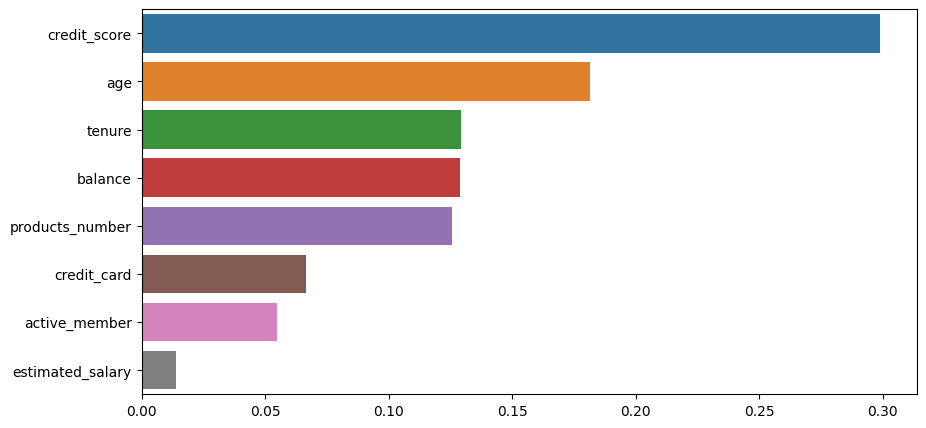

In [39]:
# 피처 중요도 출력
feature_importances = rf.feature_importances_
# 정렬
feature_importances = np.sort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=features, hue=features, dodge=False)
plt.show()

In [24]:
# !pip install imbalanced-learn

In [25]:
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
smote = SMOTE(random_state=42)

# 오버샘플링 적용
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=7, min_samples_split=2)

# 학습
dt.fit(X_train_over, y_train_over)

# 예측
y_pred = dt.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9132    0.8054    0.8559      1593
           1     0.4790    0.7002    0.5689       407

    accuracy                         0.7840      2000
   macro avg     0.6961    0.7528    0.7124      2000
weighted avg     0.8248    0.7840    0.7975      2000



In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

# 학습
rf.fit(X_train_over, y_train_over)

# 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9013    0.8255    0.8617      1593
           1     0.4861    0.6462    0.5549       407

    accuracy                         0.7890      2000
   macro avg     0.6937    0.7358    0.7083      2000
weighted avg     0.8168    0.7890    0.7993      2000



In [ ]:
# 클래스 가중치 설정

# 클래스 불균형이 심할 경우 클래스 가중치를 설정하여 학습

# 클래스 불균형이 심한 경우 클래스 가중치 설정
class_weight = {
    0: 1,
    1: 4
}

# 랜덤 포레스트 모델 생성

rf = RandomForestClassifier(random_state=42, max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200, class_weight=class_weight)

rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8836    0.9146    0.8988      1593
           1     0.6125    0.5283    0.5673       407

    accuracy                         0.8360      2000
   macro avg     0.7481    0.7214    0.7331      2000
weighted avg     0.8284    0.8360    0.8314      2000



In [ ]:
# threshold 조정

# 임계값을 조정하여 클래스의 확률을 기반으로 예측
# 클래스 1의 임계값을 0.3으로 설정
y_pred = (rf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9210    0.7464    0.8245      1593
           1     0.4302    0.7494    0.5466       407

    accuracy                         0.7470      2000
   macro avg     0.6756    0.7479    0.6856      2000
weighted avg     0.8211    0.7470    0.7680      2000



In [ ]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
# catboost 모델 적용
from catboost import CatBoostClassifier

# CatBoost 모델 생성

cat = CatBoostClassifier(random_state=42)

# 학습
cat.fit(X_train, y_train)

Learning rate set to 0.025035
0:	learn: 0.6721703	total: 4.71ms	remaining: 4.7s
1:	learn: 0.6519753	total: 9.77ms	remaining: 4.88s
2:	learn: 0.6345669	total: 13.2ms	remaining: 4.39s
3:	learn: 0.6179902	total: 26.7ms	remaining: 6.64s
4:	learn: 0.6029705	total: 30.2ms	remaining: 6.01s
5:	learn: 0.5899764	total: 33.3ms	remaining: 5.52s
6:	learn: 0.5751954	total: 35.9ms	remaining: 5.09s
7:	learn: 0.5625233	total: 39.5ms	remaining: 4.89s
8:	learn: 0.5497546	total: 45ms	remaining: 4.96s
9:	learn: 0.5384523	total: 55.5ms	remaining: 5.5s
10:	learn: 0.5290159	total: 57.6ms	remaining: 5.18s
11:	learn: 0.5183975	total: 66.9ms	remaining: 5.51s
12:	learn: 0.5092076	total: 73.7ms	remaining: 5.6s
13:	learn: 0.5021559	total: 76.9ms	remaining: 5.42s
14:	learn: 0.4928693	total: 79.4ms	remaining: 5.21s
15:	learn: 0.4852180	total: 93.9ms	remaining: 5.78s
16:	learn: 0.4775031	total: 96.1ms	remaining: 5.55s
17:	learn: 0.4696892	total: 101ms	remaining: 5.5s
18:	learn: 0.4630233	total: 105ms	remaining: 5.43s


In [42]:
# 예측
y_pred = cat.predict(X_test)

# 정확도 출력
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8718    0.9648    0.9160      1593
           1     0.7637    0.4447    0.5621       407

    accuracy                         0.8590      2000
   macro avg     0.8178    0.7048    0.7390      2000
weighted avg     0.8498    0.8590    0.8440      2000



In [43]:
# param_grid = {
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1, 1],
#     'iterations': [100, 200, 300],
# }

# grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# grid_search.fit(X_train, y_train)

# print('최적의 파라미터 :', grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.6884120	total: 55.8ms	remaining: 5.53s
0:	learn: 0.6479861	total: 56ms	remaining: 5.55s
0:	learn: 0.6884118	total: 56.8ms	remaining: 5.62s
0:	learn: 0.6884753	total: 57.4ms	remaining: 5.69s
1:	learn: 0.6832606	total: 57.6ms	remaining: 2.82s
1:	learn: 0.6059796	total: 57.8ms	remaining: 2.83s
1:	learn: 0.6832162	total: 58.4ms	remaining: 2.86s
1:	learn: 0.6833545	total: 59.1ms	remaining: 2.9s
2:	learn: 0.6787070	total: 59ms	remaining: 1.91s
2:	learn: 0.5740509	total: 59.3ms	remaining: 1.92s
2:	learn: 0.6786007	total: 59.8ms	remaining: 1.93s
2:	learn: 0.6788410	total: 60.6ms	remaining: 1.96s
3:	learn: 0.6739967	total: 60.6ms	remaining: 1.45s
3:	learn: 0.6738852	total: 61.1ms	remaining: 1.47s
3:	learn: 0.6741364	total: 61.7ms	remaining: 1.48s
3:	learn: 0.5455905	total: 61.5ms	remaining: 1.48s
4:	learn: 0.6693748	total: 61.8ms	remaining: 1.17s
4:	learn: 0.6695556	total: 63.3ms	remaining: 1.2s
4:	learn: 0.6692730	total: 

In [ ]:
# 최적의 파라미터 : {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}

cat = CatBoostClassifier(random_state=42, depth=4, iterations=100, learning_rate=0.1)

cat.fit(X_train, y_train)

0:	learn: 0.6438675	total: 1.69ms	remaining: 168ms
1:	learn: 0.6022502	total: 5.66ms	remaining: 277ms
2:	learn: 0.5707101	total: 7.35ms	remaining: 238ms
3:	learn: 0.5425939	total: 8.8ms	remaining: 211ms
4:	learn: 0.5189054	total: 31ms	remaining: 589ms
5:	learn: 0.4991506	total: 49.6ms	remaining: 777ms
6:	learn: 0.4808830	total: 54.5ms	remaining: 724ms
7:	learn: 0.4647463	total: 56.1ms	remaining: 645ms
8:	learn: 0.4521963	total: 57.5ms	remaining: 582ms
9:	learn: 0.4418610	total: 59.2ms	remaining: 533ms
10:	learn: 0.4320838	total: 60.6ms	remaining: 490ms
11:	learn: 0.4234929	total: 61.5ms	remaining: 451ms
12:	learn: 0.4161496	total: 62.5ms	remaining: 418ms
13:	learn: 0.4114258	total: 64.1ms	remaining: 394ms
14:	learn: 0.4047363	total: 68.6ms	remaining: 388ms
15:	learn: 0.3993282	total: 69.5ms	remaining: 365ms
16:	learn: 0.3944215	total: 70.6ms	remaining: 345ms
17:	learn: 0.3897186	total: 72.1ms	remaining: 329ms
18:	learn: 0.3859910	total: 73.4ms	remaining: 313ms
19:	learn: 0.3830754	tota

In [46]:
y_pred = cat.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8700    0.9661    0.9155      1593
           1     0.7662    0.4349    0.5549       407

    accuracy                         0.8580      2000
   macro avg     0.8181    0.7005    0.7352      2000
weighted avg     0.8489    0.8580    0.8421      2000

